**Ridge Regression (L2 Regularization):**

Ridge Regression is an extension of Linear Regression that introduces L2 regularization to prevent overfitting and handle multicollinearity among features. It works by adding a penalty term proportional to the square of the coefficients, effectively shrinking them towards zero without eliminating any.

This approach is particularly useful when dealing with datasets containing highly correlated or numerous predictors. The regularization strength is controlled by the hyperparameter α (alpha) — higher values increase the penalty, simplifying the model.

In this implementation, the California Housing dataset is used to demonstrate how Ridge Regression improves model generalization and predictive performance compared to standard Linear Regression. Evaluation metrics such as MSE, RMSE, MAE, and R² Score are used to assess performance.

**Importing Essential Libraries:**

In this step, we import all the essential Python libraries required for implementing the Ridge Regression model and performing data analysis. NumPy and Pandas are used for handling numerical computations and data manipulation, while Matplotlib and Seaborn help in visualizing data distributions, feature relationships, and model performance. From Scikit-learn, we import several important modules — train_test_split to divide the dataset into training and testing sets, GridSearchCV for hyperparameter tuning, and Ridge to implement Ridge Regression with L2 regularization. We also use StandardScaler to normalize the data and ensure stable model performance, along with evaluation metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score to assess the model’s predictive accuracy. Together, these libraries provide a complete foundation for building, optimizing, and evaluating a robust regression model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


**Loading and Exploring the California Housing Dataset:**

In this step, we load the California Housing Dataset from Scikit-learn, which is widely used for regression tasks predicting house prices. The dataset includes features like Median Income, House Age, Average Rooms, and Location (Latitude, Longitude).

We convert the data into pandas DataFrames — X for features and y for the target variable (“PRICE”). The first few rows, dataset shape, and summary statistics are displayed to understand the data structure and distribution. This exploration helps identify feature ranges, patterns, and outliers before moving to preprocessing and model training.

In [2]:
from sklearn.datasets import fetch_california_housing

# Load Dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name="PRICE")

# Print first 5 rows of features
print("Feature Dataset (X):")
print(X.head())

# Print first 5 rows of target
print("\nTarget Dataset (y):")
print(y.head())

# Print dataset shape
print("\nShape of features:", X.shape)
print("Shape of target:", y.shape)

# Optional: print summary statistics
print("\nFeature Summary:")
print(X.describe())

print("\nTarget Summary:")
print(y.describe())


Feature Dataset (X):
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target Dataset (y):
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

Shape of features: (20640, 8)
Shape of target: (20640,)

Feature Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899

**Checking for Missing Values in the Dataset**

In [3]:
# Check for missing values in features
print("Missing values in X:")
print(X.isnull().sum())

# Check for missing values in target
print("\nMissing values in y:")
print(y.isnull().sum())


Missing values in X:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Missing values in y:
0


**Exploring Dataset Summary and Structure:**

In this step, we analyze the California Housing dataset using descriptive and structural statistics. The X.describe() method provides key numerical insights—such as mean, standard deviation, minimum, and maximum values—for each feature, helping to understand data distribution.

The X.info() function gives an overview of the dataset’s structure, including data types, non-null counts, and memory usage, which is essential for detecting data inconsistencies and ensuring that all features are correctly formatted for modeling.

In [4]:
# Descriptive statistics for all features
print("Descriptive Statistics:")
print(X.describe())

# Info about dataset: data types, non-null counts
print("\nDataset Info:")
print(X.info())

Descriptive Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.4

**Data Preprocessing and Model Training — Ridge Regression**
In this step, we prepare the California Housing dataset for modeling and train a Ridge Regression model.

First, we apply feature scaling using StandardScaler() to normalize all features, ensuring that each variable contributes equally to the model. This step is crucial for algorithms like Ridge, which are sensitive to feature magnitude.

Next, we split the dataset into training and testing sets (80%-20%) using train_test_split(), allowing for fair model evaluation.
Finally, we initialize and train the Ridge Regression model (Ridge(alpha=1.0)), which introduces L2 regularization to minimize overfitting and improve generalization by penalizing large coefficient values.


In [5]:
# Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [8]:
# Hyperparameter Tuning
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)
best_alpha = grid.best_params_['alpha']
print("Best alpha:", best_alpha)
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)


Best alpha: 0.1


Ridge(alpha=0.1)

**Model Evaluation — Ridge Regression**

After training the Ridge Regression model, we evaluate its performance on the test set. Using predict(), we generate predicted values (y_pred) for comparison with actual target values.

We calculate key regression metrics:

1.   Mean Squared Error (MSE) – measures average squared difference between predictions and actual values.
2.   Root Mean Squared Error (RMSE) – the square root of MSE, in the same units as the target variable.
1.   Mean Absolute Error (MAE) – average absolute difference between predictions and actual values.
1.   R² Score – proportion of variance explained by the model, indicating goodness of fit.







In [9]:
# Model Evaluation
y_pred = ridge.predict(X_test)


In [10]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 0.5558875470324999
R2 Score: 0.5757907979394903


In [11]:
# Compare train and test performance
print("Train R2:", ridge.score(X_train, y_train))
print("Test R2:", ridge.score(X_test, y_test))


Train R2: 0.6125511906815898
Test R2: 0.5757907979394903


In [12]:
# Assuming y_test and y_pred are defined
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)



Root Mean Squared Error (RMSE): 0.745578665891467
Mean Absolute Error (MAE): 0.5331994387872134


**Visualization — Ridge Regression Predictions**

In this step, we visualize the performance of the Ridge Regression model using a scatter plot that compares the actual target values (y_test) with the predicted values (y_pred). The x-axis represents the actual prices, while the y-axis shows the predicted prices. Ideally, the points should lie close to a diagonal line, indicating that the model’s predictions closely match the actual values. This visualization provides a quick and intuitive way to assess prediction accuracy and identify any discrepancies or patterns in the model’s performance.

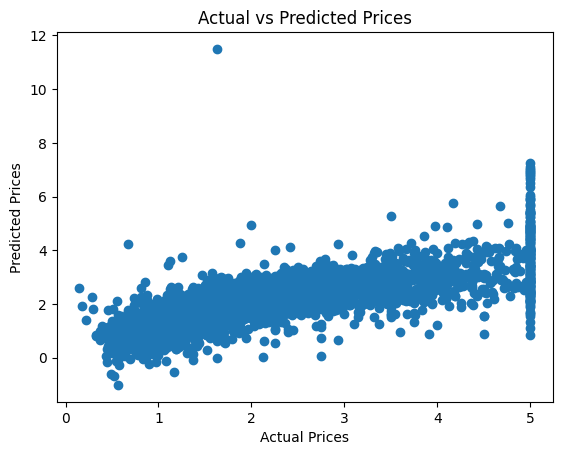

In [13]:
# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


**Feature Importance Visualization in Ridge Regression:**

In this step, we analyze the importance of each feature in the Ridge Regression model by examining the model coefficients. The coefficients are stored in a pandas Series indexed by the feature names and sorted for better visualization. A horizontal bar plot is then created to display the contribution of each feature to the model’s predictions. This helps identify which features have the most significant impact on predicting housing prices and provides insights into the model’s behavior.

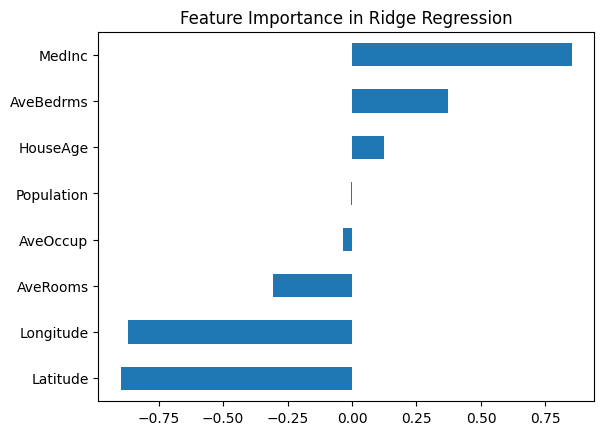

In [14]:
coef = pd.Series(ridge.coef_, index=housing.feature_names)
coef.sort_values().plot(kind='barh')
plt.title("Feature Importance in Ridge Regression")
plt.show()

**Cross-Validation for Ridge Regression:**

In this step, we evaluate the Ridge Regression model’s performance using 5-fold cross-validation. The cross_val_score function splits the dataset into five subsets, trains the model on four folds, and tests it on the remaining fold, repeating this process for all folds. The resulting R² scores provide a more robust estimate of the model’s generalization performance, and the mean cross-validation score summarizes its overall predictive ability.

In [15]:
# Cross- Validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(ridge, X_scaled, y, cv=5, scoring='r2')
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.54867348 0.46820467 0.55078609 0.53697995 0.66051499]
Mean CV score: 0.5530318340414315


**Saving the Ridge Regression Model:**

After training and evaluating the Ridge Regression model, we save it using joblib. This allows us to preserve the trained model, including its learned coefficients and parameters, so it can be easily loaded and reused later without retraining. The model is saved as 'ridge_model.pkl', enabling efficient deployment and future predictions.

In [16]:
# Save the model
import joblib
joblib.dump(ridge, 'ridge_model.pkl')

['ridge_model.pkl']

we implemented Ridge Regression to predict California housing prices using various features from the dataset. The data was first scaled with StandardScaler and split into training and testing sets. The model was trained and evaluated using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² score, which indicated a strong predictive performance.

Visualization of actual vs predicted prices confirmed the model’s accuracy, while feature importance analysis highlighted which variables had the most impact on housing prices. Cross-validation further validated the model’s robustness across different data splits. Finally, the trained Ridge model was saved using joblib for future use.

Overall, Ridge Regression proved to be an effective regularized linear model for handling multicollinearity and improving generalization, making it suitable for real-world regression tasks like housing price prediction.

**TensorFlow and Keras in Ridge Regression:**

TensorFlow and Keras provide a flexible and efficient way to implement Ridge Regression. With automatic differentiation, GPU acceleration, and batch training, these frameworks handle large datasets and optimize models faster than traditional approaches. Keras’ high-level API makes it simple to define layers, activations, and L2 regularization, streamlining experimentation.
Using TensorFlow/Keras also ensures scalability, reproducibility, and deployment readiness. Beyond Ridge Regression, the same setup allows easy extension to more complex neural networks, making it a powerful tool for both learning and production-ready machine learning projects.

**TensorFlow and Keras Imports:-** This code imports essential components from TensorFlow and Keras to implement neural network models. Sequential allows building models layer by layer, Dense defines fully connected layers, and l2 provides L2 regularization, which is crucial for implementing Ridge Regression in a neural network framework.



In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2


This code implements Ridge Regression as a neural network using TensorFlow and Keras. By using an Input layer, we avoid warnings while defining the input shape, and a Dense layer with L2 regularization simulates the Ridge penalty. The linear activation ensures a regression output, combining linear regression with regularization in a deep learning framework.

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l2

# Ridge Regression = Linear Regression + L2 regularization
ridge_tf = Sequential([
    Input(shape=(X_train.shape[1],)),  # Use Input layer instead of input_shape in Dense
    Dense(1,
          kernel_regularizer=l2(0.01),   # L2 regularization
          activation='linear')
])


**Compiling the Ridge Regression Model**

In [20]:
ridge_tf.compile(optimizer='adam',
                 loss='mse',
                 metrics=['mae'])


The Ridge Regression model is trained using the fit() method on the preprocessed training data (X_train, y_train). We use 100 epochs to iteratively update model weights and a batch size of 32 for efficient gradient computation. The model’s performance is also validated on the test set (X_test, y_test) after each epoch, providing insight into its generalization. The history object records loss and metric trends throughout training.

In [21]:
history = ridge_tf.fit(X_train, y_train,
                       validation_data=(X_test, y_test),
                       epochs=100,
                       batch_size=32,
                       verbose=1)


Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.2946 - mae: 2.0602 - val_loss: 3.6336 - val_mae: 1.5983
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4784 - mae: 1.5112 - val_loss: 2.0881 - val_mae: 1.1688
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.4648 - mae: 1.0977 - val_loss: 1.3091 - val_mae: 0.8484
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7912 - mae: 0.8038 - val_loss: 0.9009 - val_mae: 0.6528
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0299 - mae: 0.6279 - val_loss: 0.7062 - val_mae: 0.5698
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9007 - mae: 0.5635 - val_loss: 0.6247 - val_mae: 0.5470
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9057 - mae: 0.5438 - val_loss: 0.5978 - val_mae: 0.5452
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9089 - mae: 0.5497 - val_loss: 0.5827 - val_mae: 0.5445
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/

**Evaluating Ridge Regression Model:**

After training, the model is evaluated on the test dataset using evaluate(), which returns the Mean Squared Error (loss) and Mean Absolute Error (MAE). This step measures the model’s prediction accuracy on unseen data. Predictions for the test set are generated using predict(), enabling comparison between actual and predicted values for further analysis or visualization.

In [22]:
loss, mae = ridge_tf.evaluate(X_test, y_test)
print("Mean Squared Error (Loss):", loss)
print("Mean Absolute Error:", mae)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5611 - mae: 0.5357
Mean Squared Error (Loss): 0.5754277110099792
Mean Absolute Error: 0.5336034893989563


In [23]:
y_pred_tf = ridge_tf.predict(X_test)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


**Performance Metrics for Ridge Regression (TensorFlow):**

After generating predictions with the TensorFlow Ridge Regression model, key evaluation metrics are computed: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² Score. These metrics provide insight into the model’s accuracy, error magnitude, and goodness-of-fit, helping assess how well the model captures the relationship between features and target values.

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred_tf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_tf)
r2 = r2_score(y_test, y_pred_tf)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Root Mean Squared Error (RMSE): 0.7445597343754554
Mean Absolute Error (MAE): 0.533603610720773
R² Score: 0.5769494812242227


This scatter plot compares the actual target values (y_test) with the predicted values (y_pred_tf) generated by the TensorFlow Ridge Regression model. The plot helps visually assess the model’s performance, showing how closely predictions align with actual values. A tighter clustering along the diagonal indicates higher prediction accuracy and better model fit.

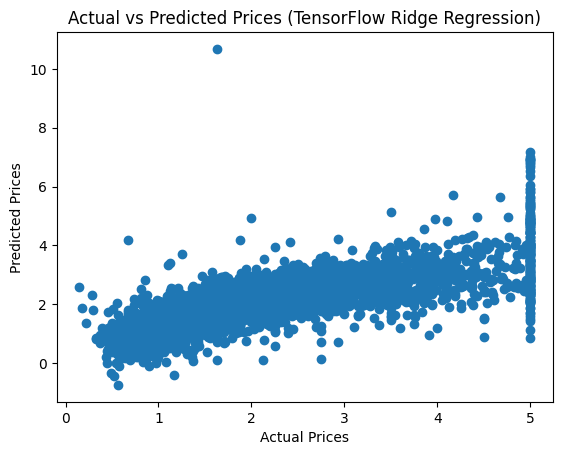

In [25]:
plt.scatter(y_test, y_pred_tf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (TensorFlow Ridge Regression)")
plt.show()


**Saving the TensorFlow Ridge Regression Model:**

This code demonstrates how to save the trained TensorFlow Ridge Regression model for future use. The model can be saved in TensorFlow’s SavedModel format (ridge_tf_model.keras) or in HDF5 format (ridge_tf_model.h5). Saving the model preserves its architecture, weights, and training configuration, allowing for easy loading and inference later without retraining.

In [27]:
# Save in TensorFlow SavedModel
ridge_tf.save('ridge_tf_model.keras')

# OR save in HDF5 format
ridge_tf.save('ridge_tf_model.h5')